# Models Infomation (MACs, FLOPs, Parameters)

In [2]:
import warnings
warnings.filterwarnings("ignore")
import thop
from models.yolov5 import Yolov5
from models.yolo_repvgg import Yolo_repvgg
from models.yolo_mobilenet import Yolo_mobilenetv2
from models.yolo_ghostnet import Yolo_ghostnet
from models.yolo_mobilenetv3 import Yolo_mobilenetv3
from models.yolo_resnet18 import Yolo_resnet18
import torch
import matplotlib.pyplot as plt
%matplotlib inline

models = [Yolov5('models/yolov5s.yaml'), 
          Yolo_repvgg('models/yolo_repvgg.yaml'),
          Yolo_mobilenetv2('models/yolo_mobilenet.yaml'),
          Yolo_mobilenetv3('models/yolo_mobilenetv3.yaml'),
          Yolo_ghostnet('models/yolo_ghostnet.yaml'),
          Yolo_resnet18('models/yolo_resnet18.yaml')
         ]

model_names = ['Yolov5', 'Yolo_repvgg', 'Yolo_mobilenetv2', 'Yolo_mobilenetv3', 'Yolo_ghostnet', 'Yolo_resnet18']
dumb = torch.randn(1, 3, 320, 320)
macs_ = []
params_ = []
flops_ = []
for model in models:
    macs, params = thop.profile(model, inputs=(dumb,), verbose=False)
    macs_.append(macs)
    params_.append(params)
    flops_.append(2*macs)
    print('{}:  {} macs, {} FLOPs, {} parameters.'.format(model.__class__.__name__, macs, 2*macs, params))
    
v5 = torch.load('runs/train/yolov5/weights/last.pt')
repvgg = torch.load('runs/train/yolo_repvgg/weights/last.pt')
mobilenetv2 = torch.load('runs/train/yolo_mobilenet/weights/last.pt')
mobilenetv3 = torch.load('runs/train/yolo_mobilenetv3/weights/last.pt')
ghostnet = torch.load('runs/train/yolo_ghostnet/weights/last.pt')
resnet18 = torch.load('runs/train/yolo_resnet18/weights/last.pt')

torch.save(v5['model'], 'model_weights/yolov5.pt')
torch.save(repvgg['model'], 'model_weights/yolo_repvgg.pt')
torch.save(mobilenetv2['model'], 'model_weights/yolo_mobilenetv2.pt')
torch.save(mobilenetv3['model'], 'model_weights/yolo_mobilenetv3.pt')
torch.save(ghostnet['model'], 'model_weights/yolo_ghostnet.pt')
torch.save(resnet18['model'], 'model_weights/yolo_resnet18.pt')

Yolov5:  2066557900.0 macs, 4133115800.0 FLOPs, 7235389.0 parameters.
Yolo_repvgg:  6773226300.0 macs, 13546452600.0 FLOPs, 15066081.0 parameters.
Yolo_mobilenetv2:  981862600.0 macs, 1963725200.0 FLOPs, 3779809.0 parameters.
Yolo_mobilenetv3:  1011367556.0 macs, 2022735112.0 FLOPs, 4735377.0 parameters.
Yolo_ghostnet:  699490404.0 macs, 1398980808.0 FLOPs, 4807461.0 parameters.
Yolo_resnet18:  5083216700.0 macs, 10166433400.0 FLOPs, 13234721.0 parameters.


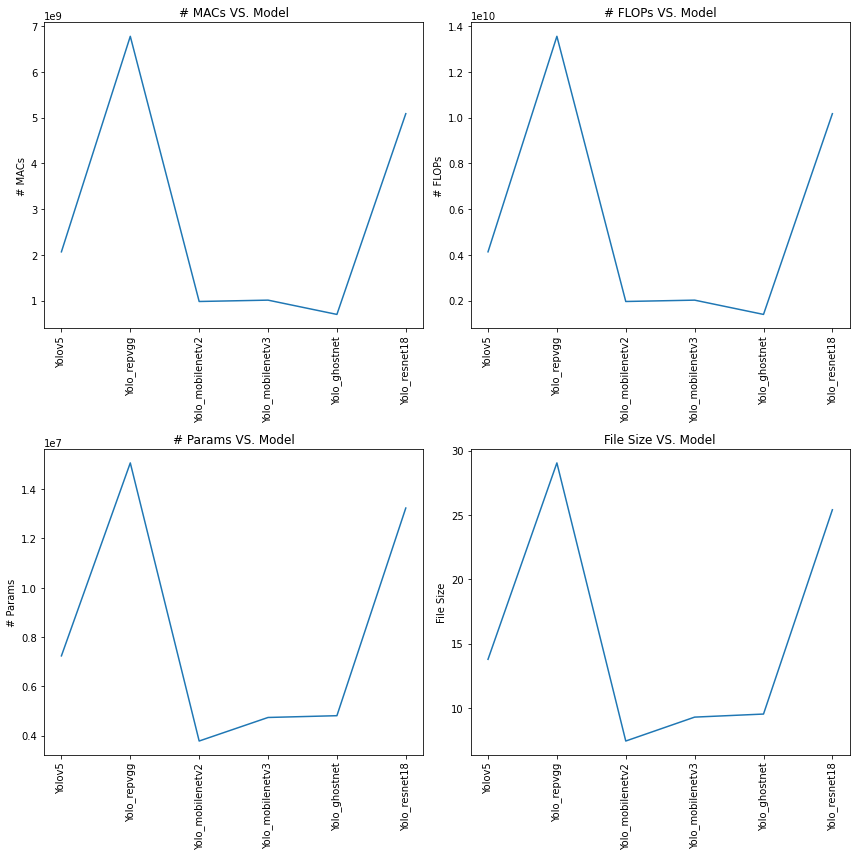

In [5]:
import os

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(model_names, macs_)
ax1.set_xticklabels(model_names, rotation=90)
ax1.set_title('# MACs VS. Model')
ax1.set_ylabel('# MACs')

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(model_names, flops_)
ax2.set_xticklabels(model_names, rotation=90)
ax2.set_title('# FLOPs VS. Model')
ax2.set_ylabel('# FLOPs')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(model_names, params_)
ax3.set_xticklabels(model_names, rotation=90)
ax3.set_title('# Params VS. Model')
ax3.set_ylabel('# Params')

ax4 = fig.add_subplot(2, 2, 4)
sizes = [os.path.getsize(x) / 1024**2 for x in ['model_weights/yolov5.pt', 'model_weights/yolo_repvgg.pt', 'model_weights/yolo_mobilenetv2.pt', 'model_weights/yolo_mobilenetv3.pt', 'model_weights/yolo_ghostnet.pt', 'model_weights/yolo_resnet18.pt']]
ax4.plot(model_names, sizes)
ax4.set_xticklabels(model_names, rotation=90)
ax4.set_title('File Size VS. Model')
ax4.set_ylabel('File Size')

plt.tight_layout()
plt.savefig('images/model_info.jpg')
plt.show()

# Train Result

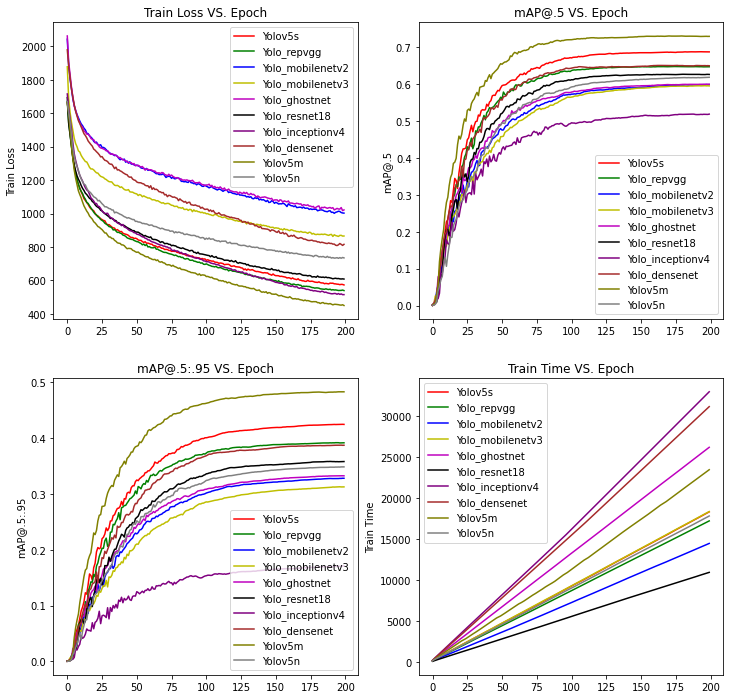

In [6]:
import torch
import numpy as np
import matplotlib
matplotlib.use('TKAgg')
import matplotlib.pyplot as plt
%matplotlib inline


v5s = torch.load('runs/train/yolov5s/weights/last.pt')
repvgg = torch.load('runs/train/yolo_repvgg/weights/last.pt')
mobilenetv2 = torch.load('runs/train/yolo_mobilenet/weights/last.pt')
mobilenetv3 = torch.load('runs/train/yolo_mobilenetv3/weights/last.pt')
ghostnet = torch.load('runs/train/yolo_ghostnet/weights/last.pt')
resnet18 = torch.load('runs/train/yolo_resnet18/weights/last.pt')
inceptionv4 = torch.load('runs/train/yolo_inceptionv4/weights/last.pt')
densenet = torch.load('runs/train/yolo_densenet/weights/last.pt')
v5m = torch.load('runs/train/yolov5m/weights/last.pt')
v5n = torch.load('runs/train/yolov5n/weights/last.pt')


model_names = ['Yolov5n', 'Yolov5s', 'Yolov5m', 'Yolo_repvgg', 'Yolo_mobilenetv2', 'Yolo_mobilenetv3', 'Yolo_ghostnet', 'Yolo_resnet18', 'Yolo_inceptionv4', 'Yolo_densenet']

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(v5s['train_losses'], 'r', label='Yolov5s')
ax1.plot(repvgg['train_losses'], 'g', label='Yolo_repvgg')
ax1.plot(mobilenetv2['train_losses'], 'b', label='Yolo_mobilenetv2')
ax1.plot(mobilenetv3['train_losses'], 'y', label='Yolo_mobilenetv3')
ax1.plot(ghostnet['train_losses'], 'm', label='Yolo_ghostnet')
ax1.plot(resnet18['train_losses'], 'k', label='Yolo_resnet18')
ax1.plot(inceptionv4['train_losses'], 'purple', label='Yolo_inceptionv4')
ax1.plot(densenet['train_losses'], 'brown', label='Yolo_densenet')
ax1.plot(v5m['train_losses'], 'olive', label='Yolov5m')
ax1.plot(v5n['train_losses'], 'grey', label='Yolov5n')
ax1.set_title('Train Loss VS. Epoch')
ax1.set_ylabel('Train Loss')
ax1.legend()

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(np.asarray(v5s['test_results'])[:, 2], 'r', label='Yolov5s')
ax2.plot(np.asarray(repvgg['test_results'])[:, 2], 'g', label='Yolo_repvgg')
ax2.plot(np.asarray(mobilenetv2['test_results'])[:, 2], 'b', label='Yolo_mobilenetv2')
ax2.plot(np.asarray(mobilenetv3['test_results'])[:, 2], 'y', label='Yolo_mobilenetv3')
ax2.plot(np.asarray(ghostnet['test_results'])[:, 2], 'm', label='Yolo_ghostnet')
ax2.plot(np.asarray(resnet18['test_results'])[:, 2], 'k', label='Yolo_resnet18')
ax2.plot(np.asarray(inceptionv4['test_results'])[:, 2], 'purple', label='Yolo_inceptionv4')
ax2.plot(np.asarray(densenet['test_results'])[:, 2], 'brown', label='Yolo_densenet')
ax2.plot(np.asarray(v5m['test_results'])[:, 2], 'olive', label='Yolov5m')
ax2.plot(np.asarray(v5n['test_results'])[:, 2], 'grey', label='Yolov5n')
ax2.set_title('mAP@.5 VS. Epoch')
ax2.set_ylabel('mAP@.5')
ax2.legend()

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.asarray(v5s['test_results'])[:, 3], 'r', label='Yolov5s')
ax3.plot(np.asarray(repvgg['test_results'])[:, 3], 'g', label='Yolo_repvgg')
ax3.plot(np.asarray(mobilenetv2['test_results'])[:, 3], 'b', label='Yolo_mobilenetv2')
ax3.plot(np.asarray(mobilenetv3['test_results'])[:, 3], 'y', label='Yolo_mobilenetv3')
ax3.plot(np.asarray(ghostnet['test_results'])[:, 3], 'm', label='Yolo_ghostnet')
ax3.plot(np.asarray(resnet18['test_results'])[:, 3], 'k', label='Yolo_resnet18')
ax3.plot(np.asarray(inceptionv4['test_results'])[:, 3], 'purple', label='Yolo_inceptionv4')
ax3.plot(np.asarray(densenet['test_results'])[:, 3], 'brown', label='Yolo_densenet')
ax3.plot(np.asarray(v5m['test_results'])[:, 3], 'olive', label='Yolov5m')
ax3.plot(np.asarray(v5n['test_results'])[:, 3], 'grey', label='Yolov5n')
ax3.set_title('mAP@.5:.95 VS. Epoch')
ax3.set_ylabel('mAP@.5:.95')
ax3.legend()

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(np.asarray(v5s['train_times']), 'r', label='Yolov5s')
ax4.plot(np.asarray(repvgg['train_times']), 'g', label='Yolo_repvgg')
ax4.plot(np.asarray(mobilenetv2['train_times']), 'b', label='Yolo_mobilenetv2')
ax4.plot(np.asarray(mobilenetv3['train_times']), 'y', label='Yolo_mobilenetv3')
ax4.plot(np.asarray(ghostnet['train_times']), 'm', label='Yolo_ghostnet')
ax4.plot(np.asarray(resnet18['train_times']), 'k', label='Yolo_resnet18')
ax4.plot(np.asarray(inceptionv4['train_times']), 'purple', label='Yolo_inceptionv4')
ax4.plot(np.asarray(densenet['train_times']), 'brown', label='Yolo_densenet')
ax4.plot(np.asarray(v5m['train_times']), 'olive', label='Yolov5m')
ax4.plot(np.asarray(v5n['train_times']), 'grey', label='Yolov5n')
ax4.set_title('Train Time VS. Epoch')
ax4.set_ylabel('Train Time')
ax4.legend()

plt.savefig('images/results.jpg')
plt.show()

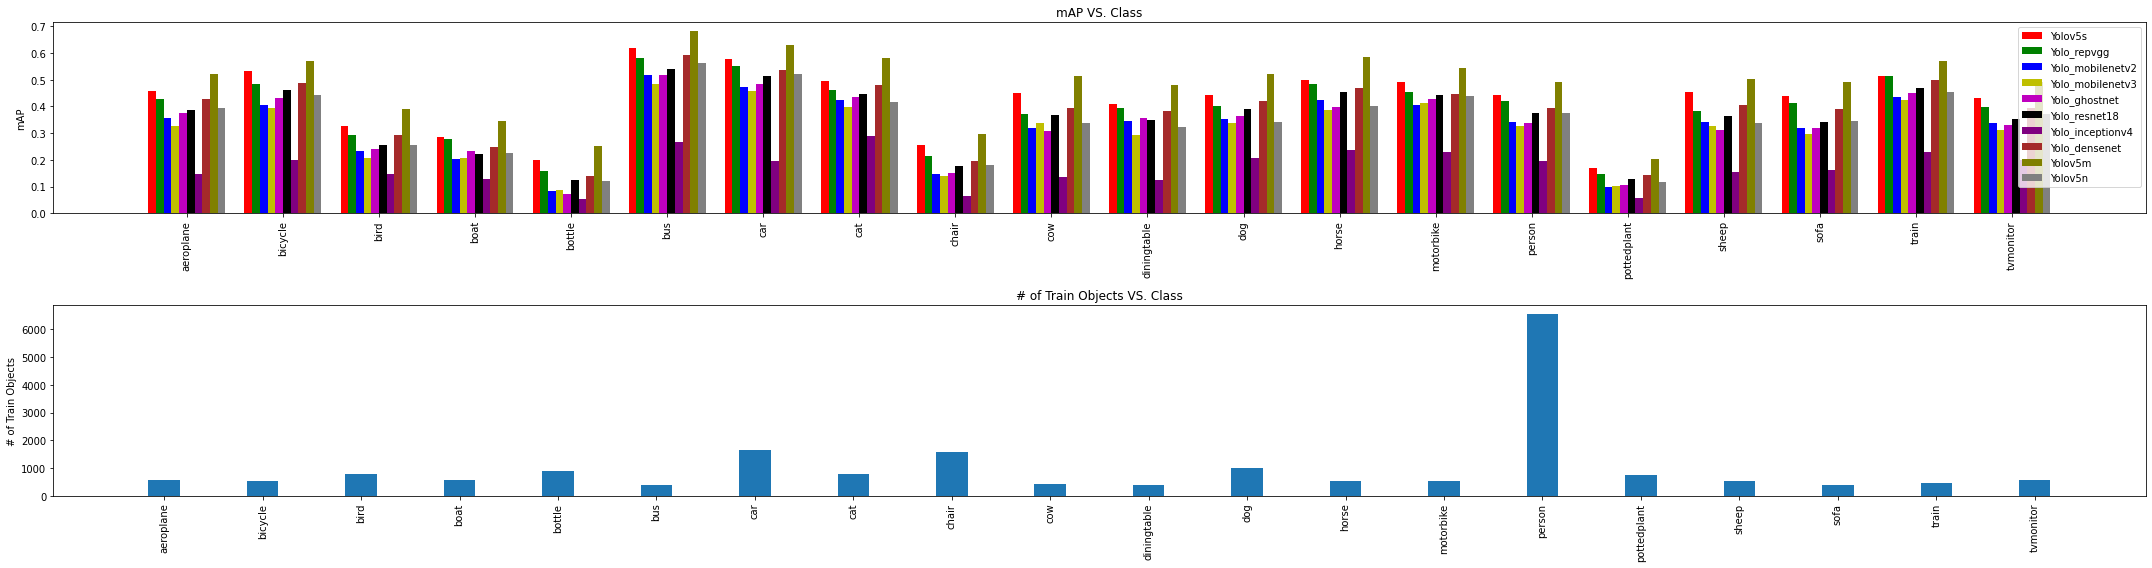

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob

train_lbl_files = glob.glob('../datasets/VOC/labels/train2012/*') + glob.glob('../datasets/VOC/labels/train2007/*')
train_lbl_files.sort()

class_ = [0 for _ in range(20)]
for file in train_lbl_files:
    with open(file, 'r') as f:
        lines = f.readlines()
    for line in lines:
        if line:
            clss = line.strip().split(' ')[0]
            class_[int(clss)] += 1

v5s = torch.load('runs/train/yolov5s/weights/last.pt')
repvgg = torch.load('runs/train/yolo_repvgg/weights/last.pt')
mobilenetv2 = torch.load('runs/train/yolo_mobilenet/weights/last.pt')
mobilenetv3 = torch.load('runs/train/yolo_mobilenetv3/weights/last.pt')
ghostnet = torch.load('runs/train/yolo_ghostnet/weights/last.pt')
resnet18 = torch.load('runs/train/yolo_resnet18/weights/last.pt')
inceptionv4 = torch.load('runs/train/yolo_inceptionv4/weights/last.pt')
densenet = torch.load('runs/train/yolo_densenet/weights/last.pt')
v5m = torch.load('runs/train/yolov5m/weights/last.pt')
v5n = torch.load('runs/train/yolov5n/weights/last.pt')

model_names = ['Yolov5n', 'Yolov5s', 'Yolov5m', 'Yolo_repvgg', 'Yolo_mobilenetv2', 'Yolo_mobilenetv3', 'Yolo_ghostnet', 'Yolo_resnet18', 'Yolo_inceptionv4', 'Yolo_densenet']
class_names = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog',
        'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
x = np.arange(0, 50, 2.5)

fig = plt.figure(figsize=(30, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(x, v5s['test_maps'][-1], width=0.2, color='r', label='Yolov5s')
ax1.bar(x+0.2, repvgg['test_maps'][-1], width=0.2, color='g', label='Yolo_repvgg')
ax1.bar(x+0.4, mobilenetv2['test_maps'][-1], width=0.2, color='b', label='Yolo_mobilenetv2')
ax1.bar(x+0.6, mobilenetv3['test_maps'][-1], width=0.2, color='y', label='Yolo_mobilenetv3')
ax1.bar(x+0.8, ghostnet['test_maps'][-1], width=0.2, color='m', label='Yolo_ghostnet')
ax1.bar(x+1, resnet18['test_maps'][-1], width=0.2, color='k', label='Yolo_resnet18')
ax1.bar(x+1.2, inceptionv4['test_maps'][-1], width=0.2, color='purple', label='Yolo_inceptionv4')
ax1.bar(x+1.4, densenet['test_maps'][-1], width=0.2, color='brown', label='Yolo_densenet')
ax1.bar(x+1.6, v5m['test_maps'][-1], width=0.2, color='olive', label='Yolov5m')
ax1.bar(x+1.8, v5n['test_maps'][-1], width=0.2, color='grey', label='Yolov5n')
ax1.set_title('mAP VS. Class')
ax1.set_ylabel('mAP')
ax1.set_xticks(x+0.9)
ax1.set_xticklabels(class_names, rotation=90)
ax1.legend()

ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(x, class_)
ax2.set_xticks(x)
ax2.set_xticklabels(class_names, rotation=90)
ax2.set_ylabel('# of Train Objects')
ax2.set_title('# of Train Objects VS. Class')

plt.tight_layout()
plt.savefig('images/map_class.jpg')
plt.show()

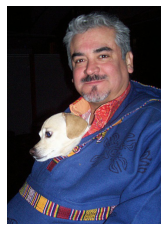

In [18]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib
matplotlib.use('TKAgg')
import matplotlib.pyplot as plt
%matplotlib inline

v5s = torch.load('runs/train/yolov5s/weights/last.pt')
repvgg = torch.load('runs/train/yolo_repvgg/weights/last.pt')
mobilenetv2 = torch.load('runs/train/yolo_mobilenet/weights/last.pt')
mobilenetv3 = torch.load('runs/train/yolo_mobilenetv3/weights/last.pt')
ghostnet = torch.load('runs/train/yolo_ghostnet/weights/last.pt')
resnet18 = torch.load('runs/train/yolo_resnet18/weights/last.pt')
inceptionv4 = torch.load('runs/train/yolo_inceptionv4/weights/last.pt')
densenet = torch.load('runs/train/yolo_densenet/weights/last.pt')
v5m = torch.load('runs/train/yolov5m/weights/last.pt')
v5n = torch.load('runs/train/yolov5n/weights/last.pt')

model_names = ['Yolov5n', 'Yolov5s', 'Yolov5m', 'Yolo_repvgg', 'Yolo_mobilenetv2', 'Yolo_mobilenetv3', 'Yolo_ghostnet', 'Yolo_resnet18', 'Yolo_inceptionv4', 'Yolo_densenet']

models = [v5s['model'].to('cuda'),
          repvgg['model'].to('cuda'),
          mobilenetv2['model'].to('cuda'),
          mobilenetv3['model'].to('cuda'),
          ghostnet['model'].to('cuda'),
          resnet18['model'].to('cuda'),
          inceptionv4['model'].to('cuda'),
          densenet['model'].to('cuda'),
          v5m['model'].to('cuda'),
          v5n['model'].to('cuda')]

img = '../datasets/VOC/images/test2007/000001.jpg'
img = Image.open(img)
plt.imshow(img)
plt.axis('off')
plt.show()
transform = transforms.Compose([transforms.Resize((320, 320)), transforms.ToTensor()])
img = transform(img)
img = img.unsqueeze(0)

<ipython-input-32-4851901e8cc8>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(model_names, rotation=90)


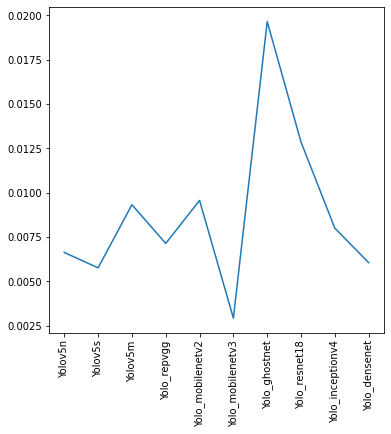

In [32]:
import time

img = img.to('cuda')
inference_time = []
for model in models:
    model.float()
    model.to('cuda')
    start = time.time()
    out = model(img)
    end = time.time()
    inference_time.append((end-start))

fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot()
ax1.plot(model_names, inference_time)
ax1.set_xticklabels(model_names, rotation=90)

plt.show()

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob

# train_lbl_files = glob.glob('../datasets/VOC/labels/train2012/*') + glob.glob('../datasets/VOC/labels/train2007/*')
train_lbl_files = glob.glob('../datasets/VOC/labels/test2007/*')
train_lbl_files.sort()
print(len(train_lbl_files))

class_ = [0 for _ in range(20)]
for file in train_lbl_files:
    with open(file, 'r') as f:
        lines = f.readlines()
    for line in lines:
        if line:
            clss = line.strip().split(' ')[0]
            class_[int(clss)] += 1
            
total_train = np.asarray(class_).sum()
print(total_train)

4952
12032
